1. What is Logistic Regression, and how does it differ from Linear Regression?
 - Logistic Regression is a statistical method used for binary or multiclass classification, not regression. It predicts probabilities using the logistic (sigmoid) function.

Linear Regression predicts continuous values using a straight line.

Logistic Regression predicts class probabilities using a sigmoid curve and classifies based on a threshold (usually 0.5).

2. What is the mathematical equation of Logistic Regression?
𝑃(𝑦=1∣𝑥)=1/1+𝑒−(𝛽0+𝛽1𝑥1+𝛽2𝑥2+…+𝛽𝑛𝑥𝑛)P(y=1∣x)=1+e −(β0+β1x1+β2x2+…+βnxn)

This is the sigmoid of the linear combination of inputs.

3. Why do we use the Sigmoid function in Logistic Regression?
 - The sigmoid function maps any real-valued number into the range (0, 1). This makes it ideal for modeling probabilities, allowing us to classify outcomes based on a threshold.

4. What is the cost function of Logistic Regression?
 - The cost function of logistic regression is a measure of the difference between the predicted probabilities and the actual labels. It's used to determine the loss or penalty for incorrect predictions. The cost function is typically defined as the negative log-likelihood of the data, given the model's parameters. In other words, it's the logarithm of the probability of observing the actual labels, given the model's predictions. This function is minimized during training to find the optimal parameters that result in the most accurate predictions. It's often referred to as the binary cross-entropy loss function.

5. What is Regularization in Logistic Regression?
 - Regularization is a technique to prevent overfitting by adding a penalty term to the cost function, discouraging overly complex models (large coefficients).

6. Why is it needed? Difference between Lasso, Ridge, and Elastic Net
 - The choice of Lasso, Ridge, or Elastic Net regression depends on the nature of the data and the specific problem being solved. Lasso (Least Absolute Shrinkage Operator) is suitable for high-dimensional data with correlated features, as it shrinks or eliminates irrelevant features. Ridge regression is used when there are highly correlated features, as it adds a penalty to the coefficients but keeps them non-zero. Elastic Net is a combination of Lasso and Ridge, suitable for cases with both high dimensionality and correlated features. The choice between these methods helps prevent overfitting and identify relevant features.

 7. When should we use Elastic Net instead of Lasso or Ridge?
 - Use Elastic Net when:

You have many correlated features.

You want both feature selection (L1) and stability (L2).

Lasso alone is unstable or removes too many features.

8. What is the impact of the regularization parameter (λ)?
 - Large λ: Strong regularization, smaller coefficients, possibly underfitting.

Small λ: Weak regularization, allows large coefficients, may overfit.

λ = 0: No regularization (pure logistic regression).

9. What are the key assumptions of Logistic Regression?
 - No multicollinearity among predictors.

Linear relationship between features and log-odds.

Observations are independent.

Large sample size for reliable estimates.

10. What are some alternatives to Logistic Regression for classification tasks?
 - Decision Trees

Random Forests

Support Vector Machines (SVM)

K-Nearest Neighbors (KNN)

Naive Bayes

Gradient Boosting (XGBoost, LightGBM)

Neural Networks

11. What are Classification Evaluation Metrics?
 - Accuracy

Precision

Recall

F1-Score

ROC-AUC

Confusion Matrix

Matthews Correlation Coefficient (MCC)

Cohen’s Kappa

Precision-Recall Curve

12. How does class imbalance affect Logistic Regression?
 - The model may be biased toward the majority class.

Metrics like accuracy become misleading.

Solutions:

Class weights

Resampling (SMOTE, undersampling)

Use metrics like F1-score, ROC-AUC, not just accuracy.

13. What is Hyperparameter Tuning in Logistic Regression?
 - It's the process of finding the best values for parameters like:

C (inverse of λ, regularization strength)

penalty (L1, L2, elasticnet)

solver (optimization algorithm)

Tuning is done using:

GridSearchCV

RandomizedSearchCV

14. What are different solvers in Logistic Regression?
 - liblinear: Good for small datasets, supports L1.

lbfgs: Fast and works well for multiclass and L2.

saga: Supports L1, L2, elasticnet, good for large datasets.

newton-cg: For L2 regularization.

15. Which solver should be used? How is Logistic Regression extended for multiclass?
 - liblinear: Binary or OvR with L1/L2.

lbfgs/saga: Best for multiclass, large data.

Multiclass extensions:

One-vs-Rest (OvR): Train one classifier per class.

Softmax (Multinomial Logistic Regression): Single model predicting all classes.




 16. What are the advantages and disadvantages of Logistic Regression?
 - Advantages:

Simple and fast

Works well with linearly separable data

Interpretable coefficients

 - Disadvantages:

Assumes linear boundary in log-odds

Poor with complex relationships

Sensitive to outliers and multicollinearity

17. What are some use cases of Logistic RegressionEmail spam detection

 - Credit default prediction

Customer churn

Medical diagnosis (disease prediction)

Fraud detection

Marketing response prediction

18. What is the difference between Softmax Regression and Logistic Regression
 - Logistic Regression: Binary classification.

Softmax Regression: Multiclass extension, outputs probabilities for all classes using the softmax function.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

 - Use OvR when:

Classes are imbalanced

Simpler implementation works

Use Softmax when:

Classes are mutually exclusive

You want direct multiclass probability predictions

20. How to Interpret Coefficients in Logistic Regression?
 - Each coefficient represents the change in the log-odds of the outcome for a one-unit increase in that predictor, holding others constant.

Positive coefficient → increases probability of positive class.

Negative coefficient → decreases it.

e^βi gives the odds ratio.



In [1]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("L1 Regularization Accuracy:", accuracy_score(y_test, y_pred))


L1 Regularization Accuracy: 0.956140350877193


In [3]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("L2 Regularization Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", model.coef_)


L2 Regularization Accuracy: 0.956140350877193
Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


In [5]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred))


Elastic Net Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [4]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.
from sklearn.datasets import load_iris

# Load multiclass data
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train OvR model
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Multiclass OvR Accuracy:", accuracy_score(y_test, y_pred))


Multiclass OvR Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


In [7]:
#7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Stratified K-Fold Accuracy Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Average Accuracy: 0.9666666666666668


In [10]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("health_activity_data.csv")

# Drop non-numeric or irrelevant columns
df_clean = df.drop(['ID', 'Blood_Pressure'], axis=1)

# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Heart_Disease_Yes', axis=1)
y = df_encoded['Heart_Disease_Yes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate and print accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'C': np.logspace(-3, 2, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

rand_search = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_dist, n_iter=10, cv=5, random_state=42)
rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best Accuracy:", rand_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(0.1668100537200059)}
Best Accuracy: 0.9012499999999999


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_test)

print("OvO Multiclass Accuracy:", accuracy_score(y_test, y_pred))


OvO Multiclass Accuracy: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


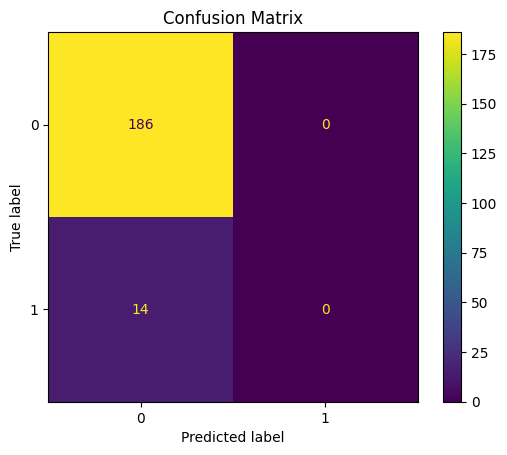

In [13]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [14]:
#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.
from sklearn.datasets import make_classification

# Simulate imbalanced data
X_imb, y_imb = make_classification(n_samples=1000, n_classes=2,
                                   weights=[0.9, 0.1], flip_y=0,
                                   n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy with Class Weights:", accuracy_score(y_test, y_pred))


Accuracy with Class Weights: 0.825


In [16]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.
import seaborn as sns

# Load dataset
titanic = sns.load_dataset("titanic")
titanic = titanic[['sex', 'age', 'fare', 'survived']].dropna()

# Convert categorical column
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

X = titanic[['sex', 'age', 'fare']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Titanic Dataset Accuracy:", model.score(X_test, y_test))


Titanic Dataset Accuracy: 0.7482517482517482


In [17]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.preprocessing import StandardScaler

# Without scaling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Without Scaling Accuracy:", model.score(X_test, y_test))

# With Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
print("With Scaling Accuracy:", model_scaled.score(X_test_scaled, y_test))


Without Scaling Accuracy: 0.7482517482517482
With Scaling Accuracy: 0.7482517482517482


In [18]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
from sklearn.metrics import roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.7475369458128078


In [19]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy with C=0.5:", model.score(X_test, y_test))


Accuracy with C=0.5: 0.7482517482517482


In [20]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.
import numpy as np

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
importance = model.coef_[0]

for name, coef in sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {coef:.4f}")


sex: 2.3703
age: -0.0184
fare: 0.0128


In [21]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.
from sklearn.metrics import cohen_kappa_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen's Kappa Score: 0.4716748768472906


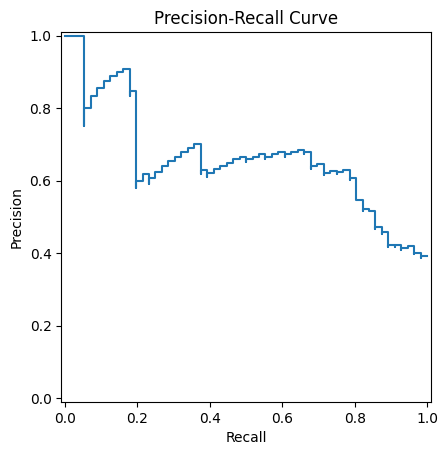

In [22]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


In [23]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.
solvers = ['liblinear', 'saga', 'lbfgs']

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Solver: {solver}, Accuracy: {score}")


Solver: liblinear, Accuracy: 0.7482517482517482
Solver: saga, Accuracy: 0.6293706293706294
Solver: lbfgs, Accuracy: 0.7482517482517482


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).
from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient (MCC): 0.47167487684729065


In [25]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.
# Raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
raw_acc = model_raw.score(X_test, y_test)

# Standardized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
scaled_acc = model_scaled.score(X_test_scaled, y_test)

print("Raw Data Accuracy:", raw_acc)
print("Standardized Data Accuracy:", scaled_acc)


Raw Data Accuracy: 0.7482517482517482
Standardized Data Accuracy: 0.7482517482517482


In [26]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.
from sklearn.model_selection import cross_val_score

C_values = [0.01, 0.1, 1, 10, 100]
for c in C_values:
    model = LogisticRegression(C=c, max_iter=1000)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"C={c}, Mean Accuracy: {scores.mean():.4f}")


C=0.01, Mean Accuracy: 0.6933
C=0.1, Mean Accuracy: 0.7732
C=1, Mean Accuracy: 0.7745
C=10, Mean Accuracy: 0.7745
C=100, Mean Accuracy: 0.7745


In [27]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
import joblib

# Train and save
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
joblib.dump(model, 'logreg_model.pkl')

# Load and predict
loaded_model = joblib.load('logreg_model.pkl')
y_pred = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred))


Loaded Model Accuracy: 0.7482517482517482
